In [5]:
import torch
import pickle as pk
import pandas as pd

In [6]:
loss = list()
from ast import literal_eval
with open("./logs/zh_train_multilingual_distilbert_129835.out", "r") as f:
    for line in f.readlines():
        if line.startswith("{'loss'"):
            loss.append(literal_eval(line))
            
loss_df = pd.DataFrame(loss)
loss_df = loss_df.drop_duplicates("epoch", keep='last')

In [7]:
loss2 = list()
from ast import literal_eval
with open("./logs/zh_train_multilingual_distilbert_from_checkpoint_179949.out", "r") as f:
    for line in f.readlines():
        if line.startswith("{'loss'"):
            loss2.append(literal_eval(line))
            
loss2_df = pd.DataFrame(loss2)
loss2_df['epoch'] = loss2_df['epoch'] + 3
loss2_df = loss2_df.drop_duplicates("epoch", keep='last')

In [8]:
loss_df = pd.concat((loss_df, loss2_df))

<AxesSubplot: xlabel='epoch'>

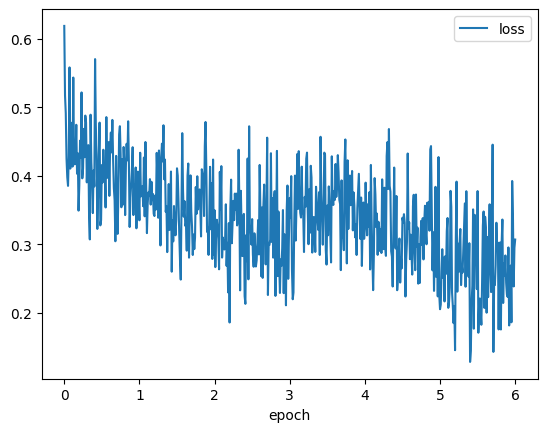

In [9]:
loss_df.plot(x='epoch', y='loss')

In [10]:
eval_loss = list()
with open("./logs/zh_train_multilingual_distilbert_129835.out", "r") as f:
    for line in f.readlines():
        if line.startswith("{'eval_loss'"):
            eval_loss.append(literal_eval(line))
            
eval_loss_df = pd.DataFrame(eval_loss)

In [11]:
eval_loss_df = eval_loss_df.drop_duplicates("epoch", keep='last')

In [12]:
eval_loss_2 = list()
with open("./logs/zh_train_multilingual_distilbert_from_checkpoint_179949.out", "r") as f:
    for line in f.readlines():
        if line.startswith("{'eval_loss'"):
            eval_loss_2.append(literal_eval(line))
            
eval_loss_df_2 = pd.DataFrame(eval_loss_2)

In [13]:
eval_loss_df_2['epoch'] = eval_loss_df_2['epoch'] + 3

eval_loss_df = pd.concat((eval_loss_df, eval_loss_df_2))

<AxesSubplot: xlabel='epoch'>

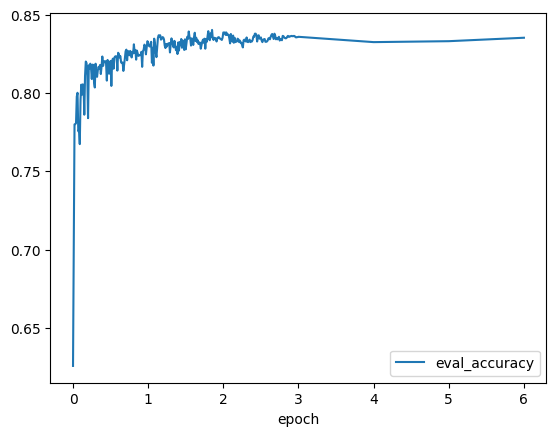

In [14]:
eval_loss_df.plot("epoch", "eval_accuracy")

<AxesSubplot: xlabel='epoch'>

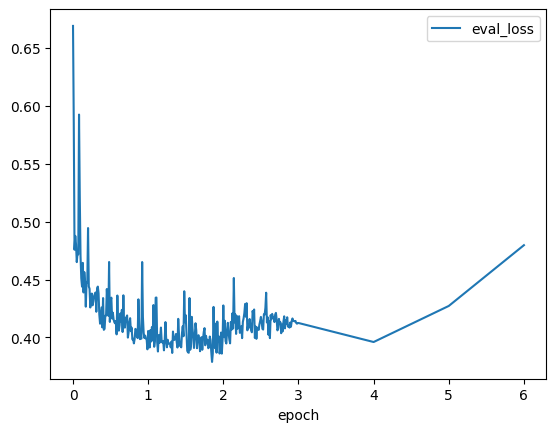

In [15]:
eval_loss_df.plot("epoch", "eval_loss")